## XAI Homework 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import preprocessing, tree
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Maths.csv")
print(data.head())

for c in data.columns:
  if type(data[c][0]) == str:
    le = preprocessing.LabelEncoder()
    le.fit(data[c])
    data[c] = le.transform(data[c])

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
for c in data.columns:
  print(c, data[c].unique())

school [0 1]
sex [0 1]
age [18 17 15 16 19 22 20 21]
address [1 0]
famsize [0 1]
Pstatus [0 1]
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob [0 1 2 3 4]
Fjob [4 2 3 1 0]
reason [0 2 1 3]
guardian [1 0 2]
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
schoolsup [1 0]
famsup [0 1]
paid [0 1]
activities [0 1]
nursery [1 0]
higher [1 0]
internet [0 1]
romantic [0 1]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [5]:
X, y = data[data.columns[:-1]], data[data.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

Model #1: logistic regression

In [6]:
lreg = LinearRegression().fit(X_train, y_train)
y_pred_lreg = lreg.predict(X_test)

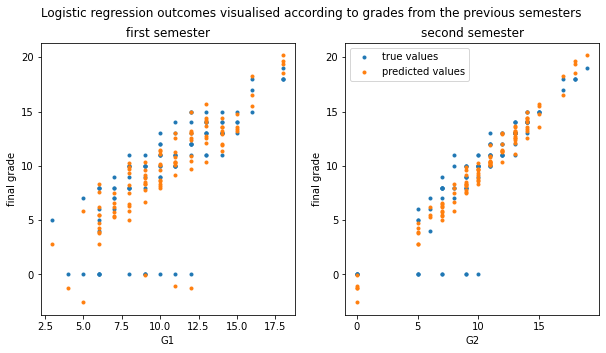

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Logistic regression outcomes visualised according to grades from the previous semesters")
ax[0].plot(X_test.iloc[:,-2], y_test, ".", label="true values")
ax[0].plot(X_test.iloc[:,-2], y_pred_lreg, ".", label="predicted values")
ax[0].set_xlabel(X_test.columns[-2])
ax[0].set_ylabel("final grade")
ax[0].set_title("first semester")
ax[1].plot(X_test.iloc[:,-1], y_test, ".", label="true values")
ax[1].plot(X_test.iloc[:,-1], y_pred_lreg, ".", label="predicted values")
ax[1].set_xlabel(X_test.columns[-1])
ax[1].set_title("second semester")
ax[1].set_ylabel("final grade")
plt.legend()

Model #2: boosting

In [8]:
#boosting
boost = XGBRegressor()
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

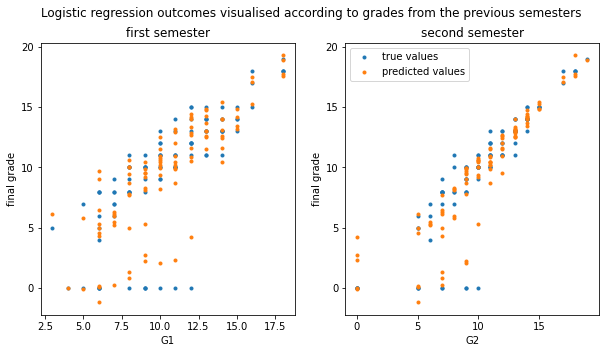

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Logistic regression outcomes visualised according to grades from the previous semesters")
ax[0].plot(X_test.iloc[:,-2], y_test, ".", label="true values")
ax[0].plot(X_test.iloc[:,-2], y_pred_boost, ".", label="predicted values")
ax[0].set_xlabel(X_test.columns[-2])
ax[0].set_ylabel("final grade")
ax[0].set_title("first semester")
ax[1].plot(X_test.iloc[:,-1], y_test, ".", label="true values")
ax[1].plot(X_test.iloc[:,-1], y_pred_boost, ".", label="predicted values")
ax[1].set_xlabel(X_test.columns[-1])
ax[1].set_title("second semester")
ax[1].set_ylabel("final grade")
plt.legend()

Model #3: Random forest

In [10]:
#random forest
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

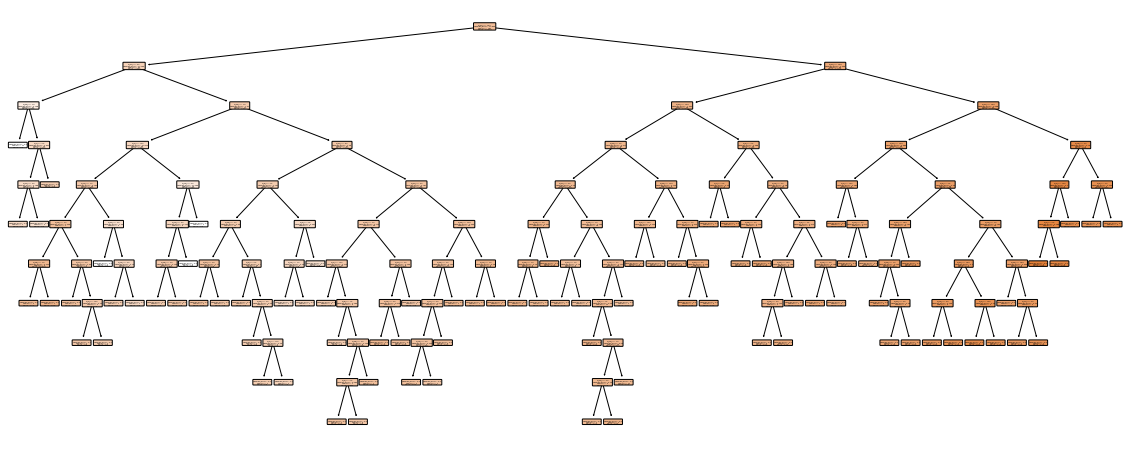

In [11]:
#visualise the forest
plt.figure(figsize=(20,8))
tree.plot_tree(rf.estimators_[18], filled=True, impurity=True, rounded=True);

Explained variance

In [12]:
print("Random forest: %0.2f\nLinear regression: %0.2f\nBoosting: %0.2f"
%tuple(explained_variance_score(y_test, y_pred) for y_pred in [y_pred_rf, y_pred_lreg, y_pred_boost]))

Random forest: 0.88
Linear regression: 0.80
Boosting: 0.87


Histogram of values from each of the models against the true values from the test dataset.

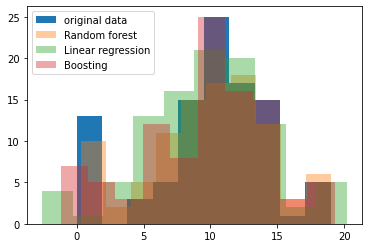

In [13]:
plt.hist(y_test, alpha=1, label='original data')
plt.hist(y_pred_rf, alpha=0.4, label='Random forest')
plt.hist(y_pred_lreg, alpha=0.4, label='Linear regression')
plt.hist(y_pred_boost, alpha=0.4, label='Boosting')
plt.legend()

Mean absolute error for the classifiers

In [14]:
print("Random forest: %0.2f\nLinear regression: %0.2f\nBoosting: %0.2f"
%tuple(mean_absolute_error(y_test, y_pred) for y_pred in [y_pred_rf, y_pred_lreg, y_pred_boost]))

Random forest: 1.04
Linear regression: 1.43
Boosting: 1.08


Random forest has the best mean absolute error value and its histogram in the lower values looks best, but linear regression explains the most variance.